## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">Libraries</p>

In [64]:
import pandas as pd
#pd.options.display.max_columns = 9999
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

from collections import Counter
from PIL import Image, ImageFont
from wordcloud import WordCloud, ImageColorGenerator

from tqdm import tqdm, tqdm_notebook
import re

from konlpy.tag import Okt
okt = Okt()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">Data</p>

> review.csv.gz
    - 리뷰 comments 분석 함에 있어 관련 데이터 확인

In [65]:
review = pd.read_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\data\\reviews.csv.gz', compression='gzip')
review.head()
#* listing_id을 사용한다.
#! reviews.csv.gz의 listing_id는 nunique는 9925개가 존재한다.
#! listing.csv.gz의  null값을 제거 하면 listing_id의 nunique값이 9925개가 존재한다.

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...


In [66]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407712 entries, 0 to 407711
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     407712 non-null  int64 
 1   id             407712 non-null  int64 
 2   date           407712 non-null  object
 3   reviewer_id    407712 non-null  int64 
 4   reviewer_name  407712 non-null  object
 5   comments       407678 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.7+ MB


> listings.csv.gz

In [67]:
#* listings.csv.gz 에서 # id와 리뷰날짜 / 리뷰 평점과 상관계수가 높은 관련 칼럼만 추출

listings = pd.read_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\data\\listings.csv.gz', compression='gzip')
data = listings[['id', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']] #* 'first_review', 'last_review', 'latitude', 'longitude'
display(listings.head(3), data.head(3))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230629055629,2023-06-29,city scrape,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.21
1,776070,https://www.airbnb.com/rooms/776070,20230629055629,2023-06-29,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.83,4.91,NaN,f,1,0,1,0,1.89
2,905944,https://www.airbnb.com/rooms/905944,20230629055629,2023-06-29,city scrape,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.90,4.77,4.77,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.49


,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79
1,776070,4.98,4.96,4.92,4.98,4.98,4.83,4.91
2,905944,4.76,4.78,4.75,4.87,4.90,4.77,4.77


In [68]:
#data.corr()['review_scores_rating'].sort_values(ascending=False).head(10)

> listings.csv : 확인해보니 활용할 중요 칼럼 없음(상관계수가 낮음)

In [69]:
review2 = review[['listing_id', 'comments']] #* date 추후 추가해볼 것
review2

,listing_id,comments
0,197677,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,The apartment is bigger than it looks in the p...
2,197677,The appartement is perfect for a couple! It is...
3,197677,We had a terrific stay at Yoshimi and Marek's ...
4,197677,We loved our stay at the Oshiage Holiday Apart...
...,...,...
407707,913007670591253524,新しい一軒家です。<br/>部屋全体綺麗です。<br/>大家さんは優しい人です。<br/>夜...
407708,913007670591253524,非常好的旅居主人，主動幫忙和協助我們需要。態度非常友善。非常建議入住！下一次我們來東京，希望...
407709,913536451520424818,とても綺麗な所でした！
407710,913660262216995906,Perfect spot in shinokubo.Just as advertised.


In [70]:
data = pd.merge(data, review2, left_on='id', right_on='listing_id',indicator=True)
#display(df.head(10), review2.head(10), data.head(10))

In [71]:
data.drop(columns=['listing_id', '_merge'], inplace=True)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">Airbnb Tokyo comment EDA</p>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:110%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Intro</p>

> 에어비엔비와 도쿄


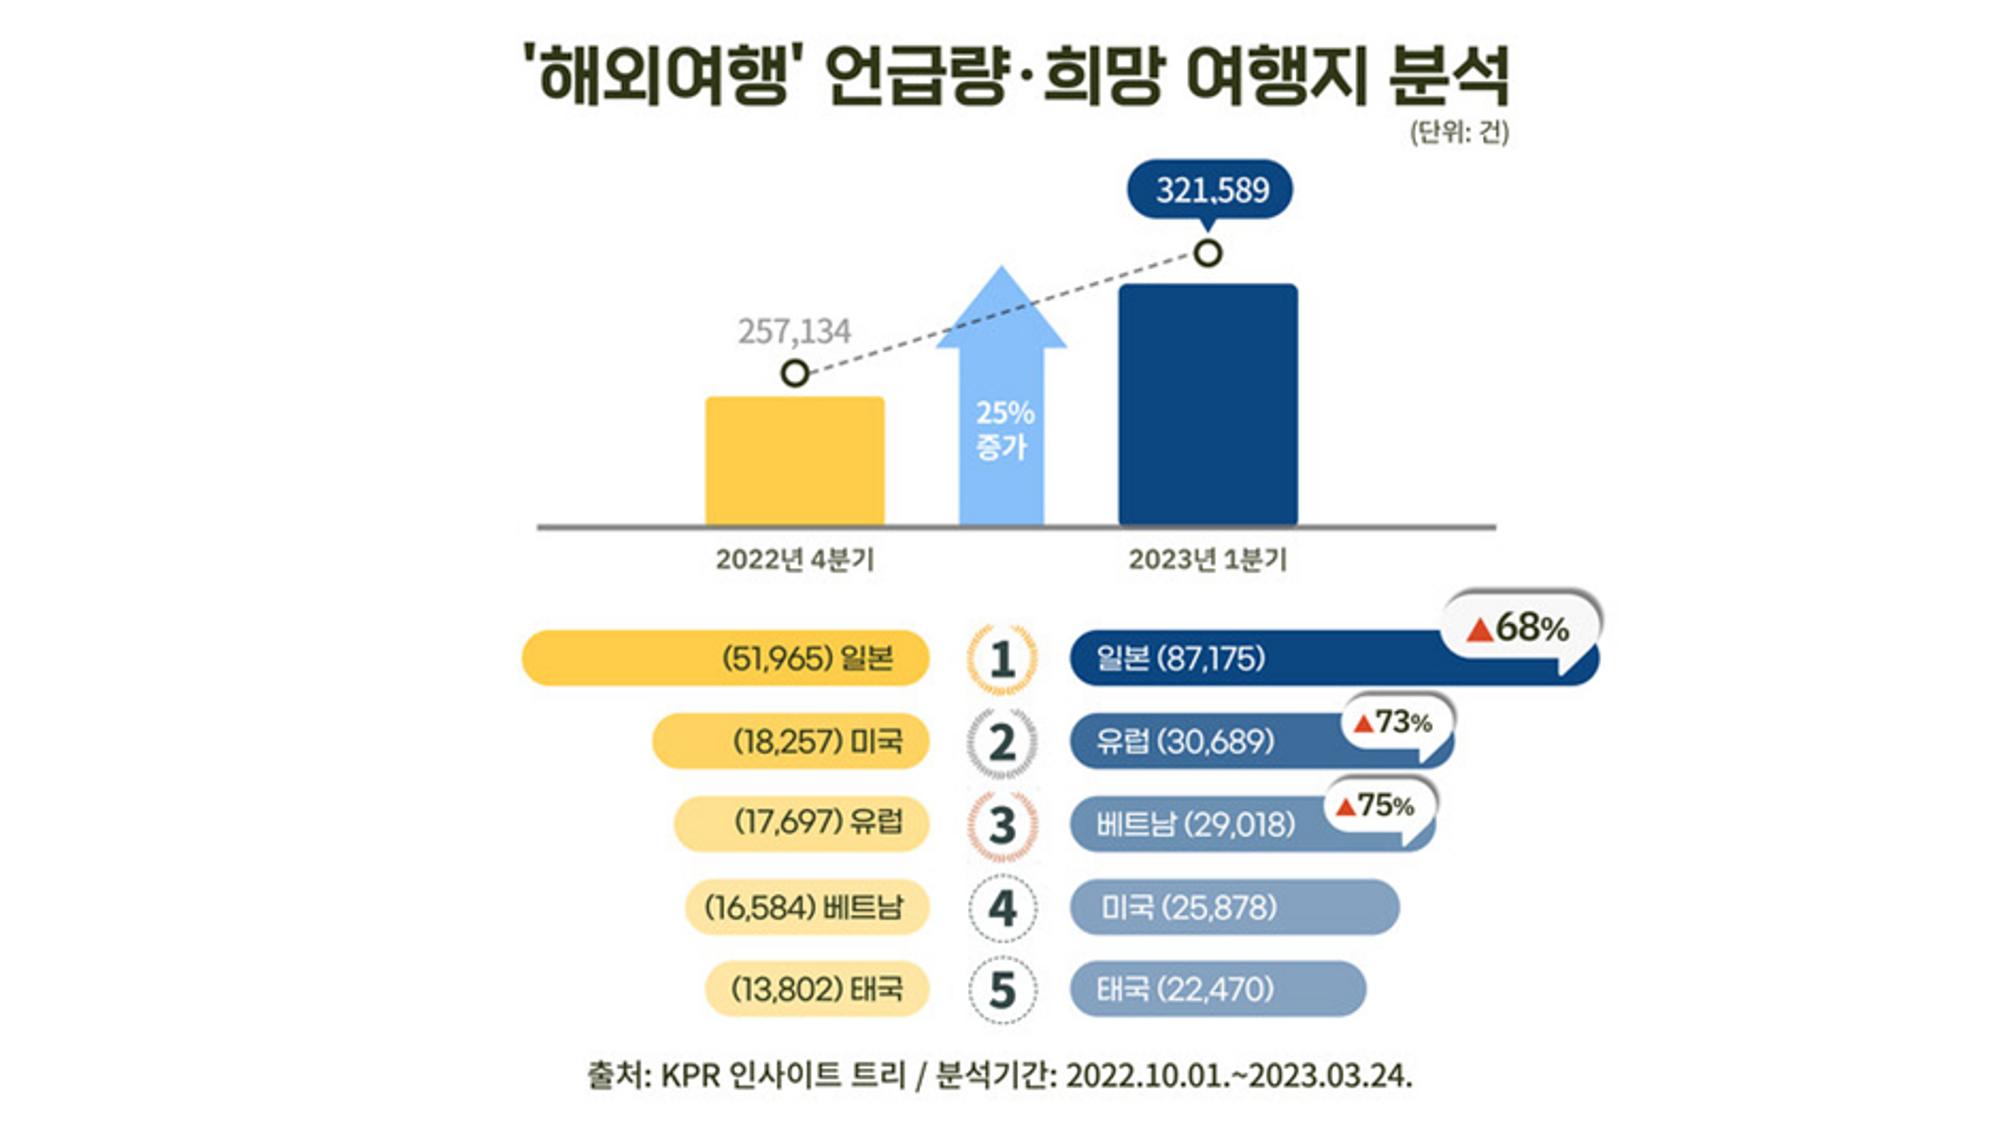

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:110%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Data</p>

In [72]:
data.head()

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments
0,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,The apartment is bigger than it looks in the p...
2,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,The appartement is perfect for a couple! It is...
3,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,We had a terrific stay at Yoshimi and Marek's ...
4,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,We loved our stay at the Oshiage Holiday Apart...


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407712 entries, 0 to 407711
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           407712 non-null  int64  
 1   review_scores_rating         407712 non-null  float64
 2   review_scores_accuracy       407710 non-null  float64
 3   review_scores_cleanliness    407710 non-null  float64
 4   review_scores_checkin        407710 non-null  float64
 5   review_scores_communication  407710 non-null  float64
 6   review_scores_location       407709 non-null  float64
 7   review_scores_value          407709 non-null  float64
 8   comments                     407678 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 31.1+ MB


In [74]:
#* 특수문자 제거
def remove_special_characters(text):
    #* \w는 숫자와 문자를, \s는 공백을, ^는 이들을 제외한 모든 문자를 의미
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', str(text))

In [75]:
data.iloc[:10, -1]

0    Couldn’t get any better!\r<br/>\r<br/>The apar...
1    The apartment is bigger than it looks in the p...
2    The appartement is perfect for a couple! It is...
3    We had a terrific stay at Yoshimi and Marek's ...
4    We loved our stay at the Oshiage Holiday Apart...
5    We loved saying at the Oshiage Holiday Apt! Th...
6    This was our first time to Tokyo, so the apart...
7    Yoshimi and Marek's Oshiage apartment was an e...
8    Yoshimi & Marek are great hosts starting with ...
9    We found the place fantastic! It was spotlessl...
Name: comments, dtype: object

In [76]:
data['comments'] = data['comments'].apply(remove_special_characters)
data['comments'] = data['comments'].str.replace('\rbr', '')
data.iloc[:10, -1]

0    Couldnt get any betterThe apartment itself is ...
1    The apartment is bigger than it looks in the p...
2    The appartement is perfect for a couple It is ...
3    We had a terrific stay at Yoshimi and Mareks l...
4    We loved our stay at the Oshiage Holiday Apart...
5    We loved saying at the Oshiage Holiday Apt The...
6    This was our first time to Tokyo so the apartm...
7    Yoshimi and Mareks Oshiage apartment was an ex...
8    Yoshimi  Marek are great hosts starting with t...
9    We found the place fantastic It was spotlessly...
Name: comments, dtype: object

In [77]:
#data.to_csv('analysis_data.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:110%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Stalking the top users</p>

In [78]:
data.head(3)

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments
0,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,Couldnt get any betterThe apartment itself is ...
1,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,The apartment is bigger than it looks in the p...
2,197677,4.78,4.74,4.92,4.84,4.83,4.53,4.79,The appartement is perfect for a couple It is ...


In [79]:
user_agg = data.groupby('id').agg({'id' : ['count']})
user_agg = user_agg.sort_values([('id', 'count')], ascending=False)
print('Top 0 reviews by Id')
user_agg

Top 0 reviews by Id


,id
,count
id,
27750681,1825
49084102,833
44125369,799
28448533,783
25377337,773
...,...
866953489763366904,1
866989263395825861,1


In [80]:
user_agg.describe()

,id
,count
count,9925.000000
mean,41.079295
std,60.073909
min,1.000000
25%,7.000000
50%,20.000000
75%,52.000000
max,1825.000000


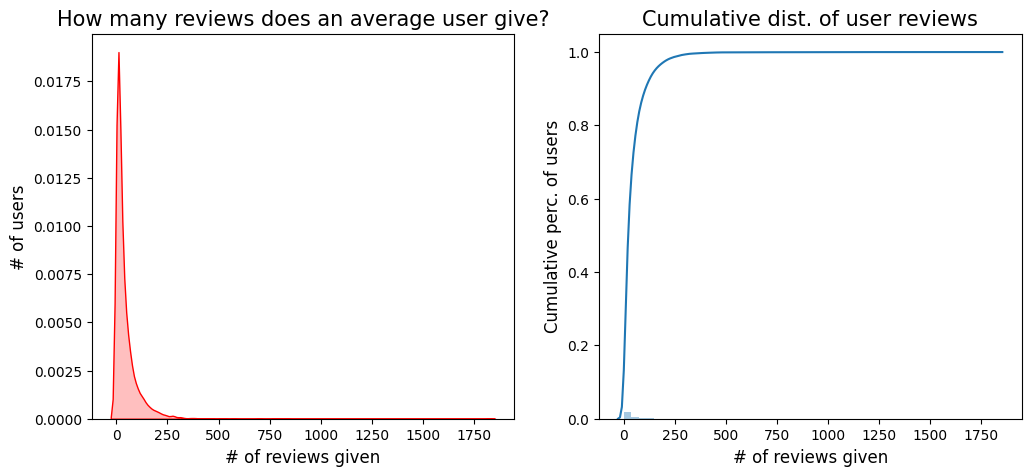

In [81]:
# Cap max reviews to 30 for better visuals
# user_agg20 = user_agg[('id','count')].loc[user_agg[('id','count')] > 30] 
plt.figure(figsize=(12,5))
#plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))

#Cumulative Distribution
ax=sns.kdeplot(user_agg[('id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()

In [82]:
#TODO 리뷰 개수가 중앙값 보다 높은 유저들의 리뷰 분석

topUsers = data.groupby('id').agg({'id': ['count']})
topUsers = topUsers.sort_values([('id', 'count')], ascending=False)
topUsers = topUsers[user_agg[('id', 'count')] >= 20].index.tolist()

In [83]:
filtered_data = data[data['id'].isin(topUsers)].reset_index(drop=True)
filtered_data.shape

(369825, 9)

In [84]:
# df6 = filtered_data.iloc[42500:46500].reset_index(drop=True)
# #df5 = df5.drop([27, 1008, 1458, 1459], axis=0)
# df6.to_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\jieun\\filtered_data\\filtered_data_df6.csv', index=False)
#* 다시 돌리기

In [86]:
# transdf = pd.read_csv("C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\jieun\\translated_csv\\transdf.csv")

In [87]:
# transdf5= pd.read_csv("C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\jieun\\translated_csv\\transDf5.csv")

In [88]:
# transdf = pd.concat([transdf, transdf1, transdf2, transdf3, transdf4, transdf5]).reset_index(drop=True)

In [89]:
# transdf.drop_duplicates(subset=['kr_comments'], keep='first', inplace=True)

In [90]:
# transdf.drop(columns=['comments'], inplace=True)
# transdf.to_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\jieun\\translated_csv\\transdf.csv', index=False)

In [91]:
# transdf = pd.read_csv('C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Tokyo_Airbnb\\jieun\\translated_csv\\transdf.csv')
# transdf.info()

In [92]:
# trans = transdf[['id', 'kr_comments']]
# trans.drop_duplicates(subset=['kr_comments'], keep='first', inplace=True)
#* id는 특정 숙소 id 에 대한 정보

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#9A3B3B; font-size:110%; text-align:left;padding: 0px; border-bottom: 3px solid #9A3B3B">Review WordCloud</p>

In [93]:
comments = trans['kr_comments']
nouns = []

for comment in tqdm_notebook(comments):
    nouns.extend(okt.nouns(comment))

NameError: name 'trans' is not defined

In [ ]:
#* 명사 빈도수 카운트
from collections import Counter
count = Counter(nouns)

In [ ]:
count

Counter({'이보': 41,
         '더': 453,
         '수': 2213,
         '아파트': 1048,
         '자체': 102,
         '모든': 1204,
         '것': 2603,
         '게다가': 32,
         '동네': 493,
         '매우': 3511,
         '가족': 414,
         '생활': 136,
         '에너지': 13,
         '슈퍼마켓': 123,
         '일부': 45,
         '편의점': 134,
         '및': 108,
         '기차역': 294,
         '정말': 1501,
         '처음': 185,
         '집': 1217,
         '구': 18,
         '물건': 34,
         '포장': 3,
         '사진': 148,
         '커플': 47,
         '관리': 39,
         '정보': 147,
         '서양인': 4,
         '우리': 1805,
         '다다미': 89,
         '바닥': 45,
         '냄새': 13,
         '나중': 24,
         '방': 537,
         '알': 112,
         '지하철역': 140,
         '도보': 500,
         '약': 123,
         '거리': 825,
         '위치': 1004,
         '이': 785,
         '노선': 86,
         '패스': 20,
         '상점': 232,
         '레스토랑': 524,
         '전반': 105,
         '경험': 571,
         '도쿄': 1672,
         '여행': 669,
     

-------------------------------------------

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#F1C93B; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #F1C93B">감성 분석 - Logistic Regression</p>

In [ ]:
a = review[['listing_id', 'date', 'comments']] 
a.columns = ['id', 'date','comments']
b = listingR_NaN_deleted[['id','first_review', 'review_scores_rating']] 
b.columns = ['id', 'date','review_scores_rating']
comment = pd.merge(a, b, on=['id','date'], how='inner')
comment.head()

NameError: name 'listingR_NaN_deleted' is not defined

In [ ]:
#* 병합된 데이터 정보 맞는지 확인
a[(a['id'] == 776070) & (a['date'] == '2012-11-28')]

In [ ]:
#* 병합된 데이터 정보 맞는지 확인2
b[b['id'] == 776070]

In [ ]:
comment.info()

In [ ]:
comment[comment['comments'].isnull()] #* 유일한 null값 제거해야 tfidf 적용 가능

In [ ]:
delindex = comment[comment['comments'].isnull()].index
comment.drop(delindex, inplace=True)

In [ ]:
df = comment[['review_scores_rating','comments']]
df.columns = ['rating', 'comments']
df.head()

In [ ]:
fig = px.histogram(df, x = 'rating')
fig.update_traces(marker_color = 'red', marker_line_width=2, marker_line_color='black', marker_opacity =0.5)
fig.show()

In [ ]:
fig2 = px.box(df, x = 'rating')
fig2.show()

In [ ]:
def rating_to_label(rating):
    if rating > 4.54: #* 1분위 수 값 
        return 1
    else:
        return 0

df['y'] = df['rating'].apply(lambda x: rating_to_label(x))
df.head()

In [ ]:
df['y'].value_counts()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 번역 우선 안함, tfidf 옵션 테스트

tfv =  TfidfVectorizer(min_df = 4, sublinear_tf=True)
text = tfv.fit_transform(df['comments'])
text

In [ ]:
print(text[0]) #* 첫 번째 리뷰에서의 단어 중요도 TF_IDF 값

In [ ]:
print(tfv.vocabulary_)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
svd_text = svd.fit_transform(text)
svd_text

In [ ]:
for idx in range(len(svd_text.shape)):
    df[f"svd_text{idx+1}"] = svd_text[:,idx]
df

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#1A5D1A; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1A5D1A">Modeling</p>

In [ ]:
from sklearn.model_selection import train_test_split

x = text
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

# predict in test set
y_pred = lr.predict(X_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

In [ ]:
lr.coef_

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

In [ ]:
invert_index_vectorizer = {v: k for k, v in tfv.vocabulary_.items()}
invert_index_vectorizer

In [ ]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

In [ ]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/#4-%EA%B0%90%EC%84%B1-%EB%B6%84%EB%A5%98-logistic-regression